In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os

from pykern.pkcollections import PKDict
from pykern import pkdebug

# The rslaser library may not be installed, so a check is required.
try:
    import rslaser
except:
    # Developers should use 'pip install -e .' from the command line.
    # Users can install directly from GitHub --
    !{sys.executable} -m pip install git+https://github.com/radiasoft/rslaser.git
    import rslaser
from rslaser.rspulse import pulse
from rslaser.utils import plot_fields, plot_tools, constants

# reset notebook style
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [2]:
# specify all top-level input parameters

# central values
a0 = 0.01             # 0.85e-9 * lambda [microns] * Sqrt(Intensity [W/cm^2])
lambda0 = 8.e-7       # wavelength [m]
tau_fwhm = 1.e-10     # FWHM pulse length [s]
w0 = 400.e-6          # waist size [m]

# let's consider a diverging pulse
_k0 = constants.TWO_PI/lambda0    # wavenumber [radians/m]   DERIVED
_zR = 0.5*_k0*w0**2         # Rayleigh range [m]       DERIVED
z_waist = -5.*_zR     # longitudinal waist position [m]
z_center = 0.0        # longitudinal position of pulse center [m]

# deviations
d_lambda = 0.         # full wavelength chirp across laser pulse [m]
dw0x = 0.0            # deviation of horizontal waist from w0
dw0y = 0.0            # deviation of vertical waist from w0
dzwx = 0.0            # deviation of horizontal waist position from z_waist
dzwy = 0.0            # deviation of vertical waist position from z_waist
x_shift = 0.          # bulk horizontal shift of pulse position
y_shift = 0.          # bulk vertical shift of pulse position

# numerical values
num_slices = 3        # desired number of slices (i.e. SRW wavefronts) to represent the pulse

# other DERIVED quantities
d_to_w = z_waist - z_center   # so-called 'drift to waist' (required by SRW)

In [3]:
# create a dictionary of all relevant physical and numerical quantities
data_in=PKDict()

data_in.a0 = a0
data_in.lambda0 = lambda0
data_in.tau_fwhm = tau_fwhm
data_in.w0 = w0
data_in.z_center = z_center
data_in.z_waist = z_waist
data_in.d_to_w = d_to_w

data_in.d_lambda = d_lambda
data_in.dw0x = dw0x
data_in.dw0y = dw0y
data_in.dzwx = dzwx
data_in.dzwy = dzwy
data_in.x_shift = x_shift
data_in.y_shift = y_shift

data_in.nslice = num_slices

In [4]:
# instantiate the laser pulse object
LP = pulse.LaserPulse(data_in)

In [5]:
# specify the desired plots
plot_1d_x_envelope = True
plot_1d_y_envelope = True
plot_1d_r_envelope = True
plot_2d_xy_envelope = True

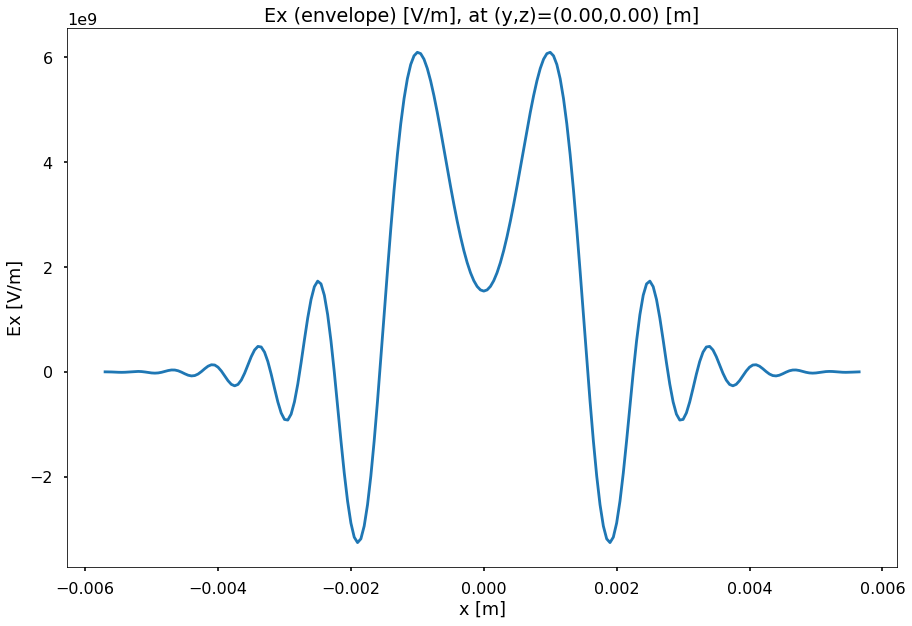

In [6]:
# plot a lineout of Ex along x
# we are assuming linear polarization along the x-axis

# Turn on print statements for a particular file, a specified module, or *all* rslaser modules
#pkdebug.init(control='gauss_hermite.py')
#pkdebug.init(control='rspulse')
#pkdebug.init(control='rslaser')

if plot_1d_x_envelope:
    _wZ = LP.envelope.w0 * math.sqrt(1+(LP.envelope.z_waist/LP.envelope.zR)**2)
    x_max = plot_tools.round_sig_fig(2.8*_wZ, 2)
    x_min = -x_max
    
#    print(' x_max = ', x_max)
#    print(' z_waist = ', LP.envelope.z_waist)

    # resolution
    x_res = 8
    del_x = LP.envelope.w0 / x_res
    num_pts = int((x_max - x_min) / del_x)
#    print('\n  num_pts = ', num_pts)

    x_vals = np.zeros(num_pts)
    for ind in range(num_pts):
        x_vals[ind] = x_min + ind*del_x
    
    y_val = 0.
#    z_val = LP.envelope.L_fwhm
    z_val = 0.

    with plt.style.context(('seaborn-poster')):
        fig = plt.figure()
        ax = fig.gca()
        plot_fields.plot_1d_x(x_vals, LP.envelope, ax, _y=y_val, _z=z_val)

    plt.tight_layout()

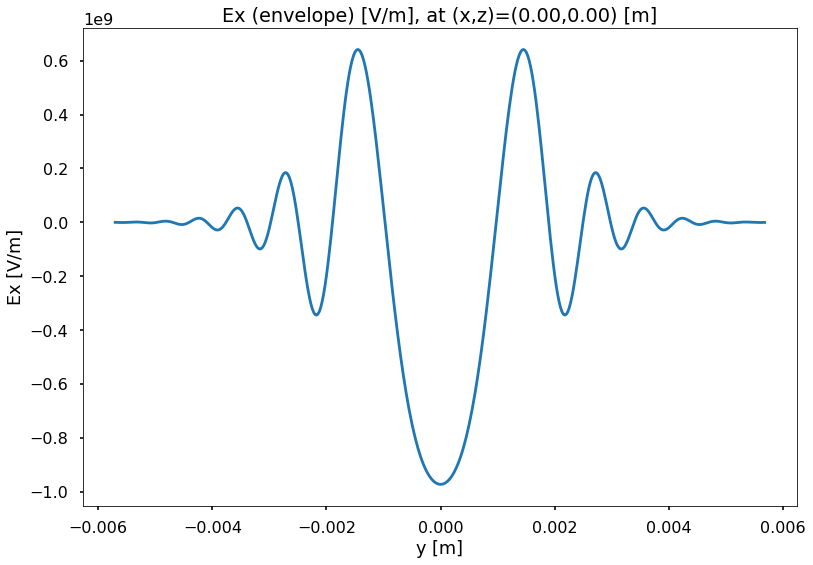

In [7]:
# plot a lineout of Ex along y
# we are assuming linear polarization along the x-axis

# Turn on print statements for a particular file, a specified module, or *all* rslaser modules
#pkdebug.init(control='gauss_hermite.py')
#pkdebug.init(control='rspulse')
#pkdebug.init(control='rslaser')

if plot_1d_y_envelope:
    _wZ = LP.envelope.w0 * math.sqrt(1+(LP.envelope.z_waist/LP.envelope.zR)**2)
    y_max = plot_tools.round_sig_fig(2.8*_wZ, 2)
    y_min = -y_max
    
#    print(' y_max = ', y_max)
#    print(' z_waist = ', LP.envelope.z_waist)

    # resolution
    y_res = 16
    del_y = LP.envelope.w0 / y_res
    num_pts = int((y_max - y_min) / del_y)
#    print('\n  num_pts = ', num_pts)

    y_vals = np.zeros(num_pts)
    for ind in range(num_pts):
        y_vals[ind] = y_min + ind*del_y
    
    x_val = 1.0*_wZ                    # evaluate at position shifted in x
    z_val = 1.0*LP.envelope.L_fwhm     # evaluate at longitudinally shifted position

    with plt.style.context(('seaborn-poster')):
        fig = plt.figure()
        ax = fig.gca()
        plot_fields.plot_1d_y(y_vals, LP.envelope, ax, _x=x_val, _z=z_val)

#    plt.tight_layout()

 r_max =  0.0057
 z_waist =  -3.141592653589793

  num_pts =  114


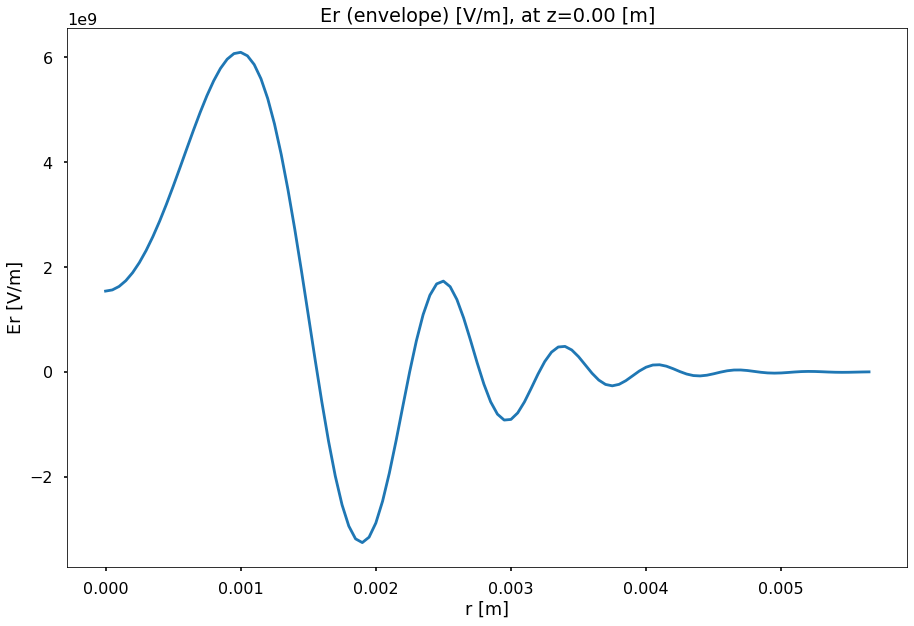

In [8]:
# plot a lineout of Er along r
# we are assuming circular polarization

# Turn on print statements for a particular file, a specified module, or *all* rslaser modules
#pkdebug.init(control='gauss_hermite.py')
#pkdebug.init(control='rspulse')
#pkdebug.init(control='rslaser')

if plot_1d_r_envelope:
    _wZ = LP.envelope.w0 * math.sqrt(1+(LP.envelope.z_waist/LP.envelope.zR)**2)
    r_max = plot_tools.round_sig_fig(2.8*_wZ, 2)
    r_min = 0.
    
    print(' r_max = ', r_max)
    print(' z_waist = ', LP.envelope.z_waist)

    # resolution
    r_res = 8
    del_r = LP.envelope.w0 / r_res
    num_pts = int((r_max - r_min) / del_r)
    print('\n  num_pts = ', num_pts)

    r_vals = np.zeros(num_pts)
    for ind in range(num_pts):
        r_vals[ind] = r_min + ind*del_r
    
#    z_val = LP.envelope.L_fwhm
    z_val = 0.

    with plt.style.context(('seaborn-poster')):
        fig = plt.figure()
        ax = fig.gca()
        plot_fields.plot_1d_r(r_vals, LP.envelope, ax, z_val)

    plt.tight_layout()

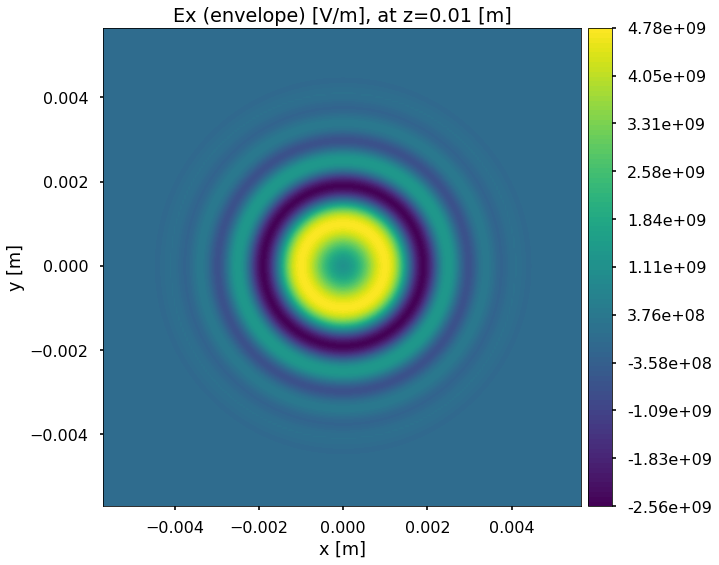

In [9]:
# generate a 2D contour plot of Ex in the transverse plane
# we are assuming linear polarization along the x-axis

# Turn on print statements for a particular file, a specified module, or *all* rslaser modules
#pkdebug.init(control='gauss_hermite.py')
#pkdebug.init(control='rspulse')
#pkdebug.init(control='rslaser')

if plot_2d_xy_envelope:
    _wZ = LP.envelope.w0 * math.sqrt(1+(LP.envelope.z_waist/LP.envelope.zR)**2)
    x_max = plot_tools.round_sig_fig(2.8*_wZ, 2)
    x_min = -x_max
    
    y_max = x_max
    y_min = -y_max

    # resolution
    x_res = 8
    del_x = LP.envelope.w0 / x_res
    num_pts = int((x_max - x_min) / del_x)
#    print('\n  num_pts = ', num_pts)
    
    del_y = (y_max - y_min) / num_pts

    x_vals = np.zeros(num_pts)
    for ind in range(num_pts):
        x_vals[ind] = x_min + ind*del_x

    y_vals = np.zeros(num_pts)
    for ind in range(num_pts):
        y_vals[ind] = y_min + ind*del_y
    
    z_val = LP.envelope.z_center + 0.5*LP.envelope.L_fwhm
    num_levels = 100

    with plt.style.context(('seaborn-poster')):
        fig = plt.figure()
        ax = fig.gca()
        plot_fields.plot_2d_xy(x_vals, y_vals, LP.envelope, ax, _z=z_val, _nlevels=num_levels)